In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from micrograd.micrograd import Value
from micrograd.neuron import MicroNetwork

In [2]:
np.random.seed(42)

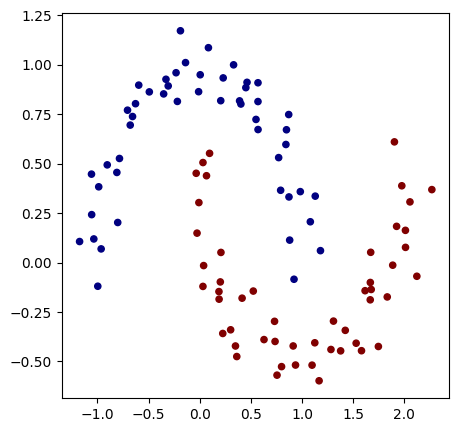

In [3]:
# make up a dataset

from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [4]:
#labels = [-1, 1]
#X = np.random.uniform(-1, 1, size=(1000, 2))
#y = np.where(X[:, 1] > np.sin(X[:, 0]*2*(np.pi)), labels[0], labels[1])

In [8]:
nnet = MicroNetwork(nin=2, nouts=[(16, "relu"), (16, "relu"), (1, "tanh")])
n_epochs = 100
batch_size = 100
alpha = 0.0001 
lr = 1.

#pbar = tqdm(total=n_epochs)
for e in range(n_epochs):
    idxs = np.random.permutation(X.shape[0]).reshape((-1, batch_size))
    accuracy, total_loss = 0., 0.
    for batch in idxs:
        scores = [nnet(X[i, :]) for i in batch]
        # max margin
        data_loss = sum([(1 - y[i] * s).leaky_relu(0.) for i, s in zip(batch, scores)])/batch_size
        # regularization
        reg_loss = alpha * sum([p*p for p in nnet.parameters()])
        loss = data_loss + reg_loss
                
        loss.backward()
        nnet.update(lr)
        nnet.zero_grad()

        accuracy += sum([(s.data > 0) * (y[i] == 1) + (s.data < 0) * (y[i] == -1) for i, s in zip(batch, scores)])
        total_loss += loss.data

    # learning rate schedule
    lr = 1. - 0.9 * e/n_epochs 
    #pbar.update(1)
    # Add additional information to the progress bar
    #pbar.set_postfix({"loss": total_loss/idxs.shape[0], "accuracy": accuracy/X.shape[0]})
    print(f"Epoch {e} loss {total_loss/idxs.shape[0]}  accuracy {accuracy/X.shape[0]}")
    

Epoch 0 loss 0.9906884786600519  accuracy 0.5
Epoch 1 loss 0.9298469459080141  accuracy 0.54
Epoch 2 loss 0.7759336809172449  accuracy 0.65
Epoch 3 loss 0.6612838452944674  accuracy 0.67
Epoch 4 loss 0.5798761351420081  accuracy 0.72
Epoch 5 loss 0.5159134625011621  accuracy 0.77
Epoch 6 loss 0.41734541855917157  accuracy 0.82
Epoch 7 loss 0.3280482469389895  accuracy 0.86
Epoch 8 loss 0.3525131512808763  accuracy 0.85
Epoch 9 loss 0.27247333772572985  accuracy 0.88
Epoch 10 loss 0.2470163489528634  accuracy 0.87
Epoch 11 loss 0.23322608832646075  accuracy 0.88
Epoch 12 loss 0.2201625201412073  accuracy 0.9
Epoch 13 loss 0.20838043817527788  accuracy 0.91
Epoch 14 loss 0.19689312169643786  accuracy 0.93
Epoch 15 loss 0.1840684889472839  accuracy 0.93
Epoch 16 loss 0.1755836673199788  accuracy 0.94
Epoch 17 loss 0.17032230578491148  accuracy 0.94
Epoch 18 loss 0.1793098449639217  accuracy 0.93
Epoch 19 loss 0.20388772773808367  accuracy 0.9
Epoch 20 loss 0.2652106511123885  accuracy 0.9

In [9]:
XX, YY = np.meshgrid(np.arange(-1.5, 2.5, 0.1), np.arange(-0.75, 1.6, 0.1))
#YY = np.meshgrid(np.arange(-0.75, 1.6, 0.1))
Z2 = np.zeros(XX.shape)
for i in range(XX.shape[0]):
    for j in range(XX.shape[1]):
        Z2[i, j] = nnet([XX[i, j], YY[i, j]]).data

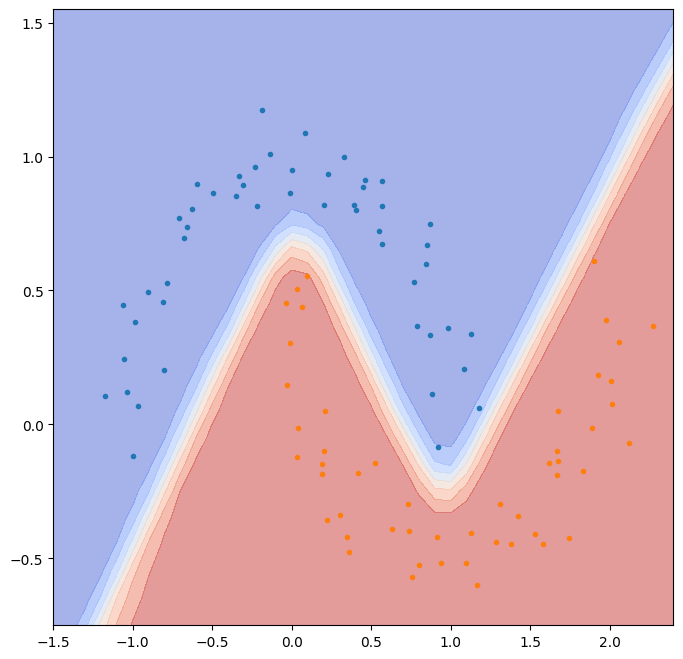

In [10]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(X[y == -1 , 0], X[y == -1, 1], marker='.', ls='')
ax.plot(X[y == 1 , 0], X[y == 1, 1], marker='.', ls='')
ax.contourf(XX, YY, Z2, cmap="coolwarm", alpha=0.5)